Project weather predict dit4bears.hack 14-15.11.2020 
made by Alex Bocharov skype bam271074



In [68]:
import pandas as pd  #for work with dataframes
import numpy as np
import matplotlib.pyplot as plt  # lib for plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score  #metric to eval classification
from sklearn.ensemble import RandomForestClassifier

RS=42   #we will fix random state



In [3]:
#let s upload files
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print ('User uploaded file {name} with length {length} bytes'.format(name=fn, \
                                                                       length=len(uploaded[fn])))

Saving 2803RCMH04.xlsx to 2803RCMH04.xlsx
User uploaded file 2803RCMH04.xlsx with length 1988785 bytes


In [69]:
#let s build dataframe with our dataset
df_data = pd.read_excel('2803RCMH04.xlsx')
df_data.head()

,Date,Time(+02:00),S1,S2,S3,Friction,State,Ta,S7,Tsurf,S9,S10,S11,Water,Speed,Direction,Latitude,Longitude,Height,Accuracy,Tdew,Friction2,Distance,Serial(RCM411 V 2.59 2016-09-29 - RCM Mobile v1.1.2),TaOBD,AirFlowRateOBD,LambdaOBD
0,2018-03-28,09:10:21,68.32,58.84,38.828,0.38,6,-8.3,270.9,-9.06,1049.8,680.7,1.678,0.0,0.0,NaN,69.473631,25.509317,198,6.0,NaN,NaN,NaN,H04,NaN,NaN,NaN
1,2018-03-28,09:10:22,68.60,59.22,39.098,0.37,6,-8.3,271.0,-9.24,1051.8,682.1,1.678,0.0,0.0,NaN,69.473630,25.509304,197,6.0,NaN,NaN,NaN,H04,NaN,NaN,NaN
2,2018-03-28,09:10:23,68.11,58.73,38.732,0.37,6,-8.3,270.9,-9.16,1047.1,679.4,1.678,0.0,0.0,NaN,69.473628,25.509296,196,6.0,NaN,NaN,NaN,H04,NaN,NaN,NaN
3,2018-03-28,09:10:24,67.98,58.57,38.620,0.37,6,-8.3,271.0,-9.01,1046.2,679.0,1.678,0.0,0.0,NaN,69.473625,25.509292,196,4.0,NaN,NaN,NaN,H04,NaN,NaN,NaN
4,2018-03-28,09:10:25,67.88,58.48,38.559,0.37,6,-8.3,271.1,-8.93,1045.1,678.6,1.678,0.0,0.0,NaN,69.473620,25.509283,196,4.0,NaN,NaN,NaN,H04,NaN,NaN,NaN


In [70]:
df_data.shape

(14060, 27)

In [71]:
df_data.isna

<bound method DataFrame.isna of             Date Time(+02:00)     S1  ... TaOBD  AirFlowRateOBD  LambdaOBD
0     2018-03-28     09:10:21  68.32  ...   NaN             NaN        NaN
1     2018-03-28     09:10:22  68.60  ...   NaN             NaN        NaN
2     2018-03-28     09:10:23  68.11  ...   NaN             NaN        NaN
3     2018-03-28     09:10:24  67.98  ...   NaN             NaN        NaN
4     2018-03-28     09:10:25  67.88  ...   NaN             NaN        NaN
...          ...          ...    ...  ...   ...             ...        ...
14055 2018-03-28     15:14:38  33.64  ...   NaN             NaN        NaN
14056 2018-03-28     15:14:39  33.71  ...   NaN             NaN        NaN
14057 2018-03-28     15:14:40  33.61  ...   NaN             NaN        NaN
14058 2018-03-28     15:14:41  33.69  ...   NaN             NaN        NaN
14059 2018-03-28     15:14:42  33.68  ...   NaN             NaN        NaN

[14060 rows x 27 columns]>

In [72]:
df_data.isnull().sum()

Date                                                        0
Time(+02:00)                                                0
S1                                                          0
S2                                                          0
S3                                                          0
Friction                                                    0
State                                                       0
Ta                                                          0
S7                                                          0
Tsurf                                                       0
S9                                                          0
S10                                                         0
S11                                                         0
Water                                                       0
Speed                                                       0
Direction                                                 662
Latitude

In [73]:
df_data.fillna(0,inplace=True)

In [74]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
S3,14060.0,21.220037,12.489854,-2.129000,12.479750,21.650000,29.475500,84.446000
Friction,14060.0,0.403897,0.127406,0.210000,0.330000,0.380000,0.420000,0.810000
State,14060.0,5.409033,1.396465,1.000000,6.000000,6.000000,6.000000,6.000000
S7,14060.0,408.783378,107.435150,261.900000,335.175000,389.900000,452.200000,1180.400000
Tsurf,14060.0,-4.795160,2.616267,-10.650000,-6.800000,-4.680000,-2.940000,0.730000
S9,14060.0,939.299566,148.933136,67.000000,904.975000,1016.500000,1029.800000,1051.800000
S10,14060.0,651.416209,54.671709,56.200000,658.200000,662.000000,669.600000,691.700000
S11,14060.0,1.678089,0.000404,1.678000,1.678000,1.678000,1.678000,1.680000
Water,14060.0,0.000963,0.011372,0.000000,0.000000,0.000000,0.000000,0.353000
Speed,14060.0,62.139260,27.424201,0.000000,59.000000,73.900000,79.100000,90.800000


In [75]:
df_data['State'].value_counts()

6    10578
5     2258
1     1186
2       21
4       14
3        3
Name: State, dtype: int64

Text(0.5, 1.0, 'Water')

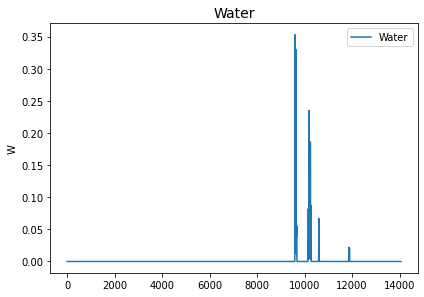

In [76]:
#let s build plot with oil prices
df_data['Water'].plot(ax=plt.gca(), label='Water')
plt.legend(loc=0)
plt.ylabel('W')
plt.tight_layout()
plt.title('Water', fontsize=14)

Stage 2.Model build


We take Random Forest as a good model to start with.

In [77]:
df_data.columns

Index(['Date', 'Time(+02:00)', 'S1', 'S2', 'S3', 'Friction', 'State', 'Ta',
       'S7', 'Tsurf', 'S9', 'S10', 'S11', 'Water', 'Speed', 'Direction',
       'Latitude', 'Longitude', 'Height', 'Accuracy', 'Tdew', 'Friction2',
       'Distance', 'Serial(RCM411 V 2.59 2016-09-29 - RCM Mobile v1.1.2)',
       'TaOBD', 'AirFlowRateOBD', 'LambdaOBD'],
      dtype='object')

In [78]:
X_features=[ 'Friction', 'Ta',
       'S7', 'Tsurf', 'S9', 'S10', 'S11', 'Water', 'Speed', 'Direction',
       'Latitude', 'Longitude', 'Height', 'Accuracy']

In [79]:
Target=['State']


In [80]:
#divide dataset to train and test

X_train, X_test, y_train, y_test=train_test_split(df_data[X_features],
                                                  df_data[Target], shuffle = True,
                                                test_size=0.1,random_state=RS)

In [81]:
clf=RandomForestClassifier(n_estimators=100,
    max_depth=5,
    class_weight='balanced',  #classes unbalanced, so we use that param
    verbose=1,                       
    random_state=RS,
)

In [65]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [66]:
clf.score(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9488888888888889

In [67]:
clf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.96

In [ ]:
#TO DO: save model and use in Telegram Bot